In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Pivot Table Example

In [2]:
data = sns.load_dataset('tips')
data_pivot = pd.pivot_table(data, index='smoker', columns='day', values='total_bill', aggfunc='sum').reset_index()
data_pivot

day,smoker,Thur,Fri,Sat,Sun
0,Yes,326.24,252.20,893.62,458.28
1,No,770.09,73.68,884.78,1168.88


## Python Libraries version

In [3]:
print("Python Libraries version:")
print(' - '*20)
print("Pandas version: ", pd.__version__)
print("Numpy version: ", np.__version__)
print("Matplotlib version: ", plt.matplotlib.__version__)

Python Libraries version:
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Pandas version:  1.5.3
Numpy version:  1.23.5
Matplotlib version:  3.7.0


## Create a Dataframe

In [4]:
path = 'data/AppleStore.csv'
data = pd.read_csv(path,sep=';')
data.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


## Pivot Table

In [5]:
# Pivot table
# filter the data to keep only the top 15 genres
top_genre = data.value_counts('prime_genre')[:15].index.tolist()
tmp = data.loc[data['prime_genre'].isin(top_genre),['prime_genre','user_rating','price']]
# create a new column with the rating rounded to the nearest integer
tmp['user_rating'] = [f'rating_{str(math.trunc(item))}' for item in tmp['user_rating']]
# create a pivot table
tmp_pivot = (pd.pivot_table(data = tmp, columns='user_rating', index='prime_genre', values='price', aggfunc='mean', fill_value=0).reset_index().round(2))
# rename the columns
tmp_pivot.columns.name=''
# print the pivot table
tmp_pivot

,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.49,0.00,5.32,1.66,3.04,1.92
1,Education,3.42,1.79,1.95,2.32,5.20,3.12
2,Entertainment,0.51,1.99,0.78,0.90,0.95,1.03
3,Finance,0.30,0.00,0.00,0.73,0.53,0.50
4,Games,0.85,0.84,1.21,1.71,1.52,1.29
5,Health & Fitness,1.33,3.24,1.50,1.21,2.15,1.83
6,Lifestyle,0.29,1.27,0.81,0.90,1.08,1.37
7,Music,2.74,0.00,0.00,2.08,5.27,13.16
8,Photo & Video,0.75,0.74,1.36,2.16,1.47,1.33
9,Productivity,0.66,2.49,0.99,4.90,4.73,2.61


## Styling: Setting Background Color for Headers

In [6]:
# Styling: Changing Background Color for Column Headers
headers = {
 'selector': 'th.col_heading',
 'props': 'background-color: #5E17EB; color: white;'
}
index_style = {
 'selector': 'th.index_name',
 'props': 'background-color: #5E17EB; color: white;'
}
tmp_pivot_style = (
 tmp_pivot
 .style
 .set_table_styles([headers,index_style])
 .set_properties(**{'background-color': '#ECE3FF','color': 'black'})
)
tmp_pivot_style

,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000
5,Health & Fitness,1.330000,3.240000,1.500000,1.210000,2.150000,1.830000
6,Lifestyle,0.290000,1.270000,0.810000,0.900000,1.080000,1.370000
7,Music,2.740000,0.000000,0.000000,2.080000,5.270000,13.160000
8,Photo & Video,0.750000,0.740000,1.360000,2.160000,1.470000,1.330000
9,Productivity,0.660000,2.490000,0.990000,4.900000,4.730000,2.610000


## Style: Setting the background color for a particular cell

In [7]:
(
   tmp_pivot
   .style
   .set_table_styles([headers, index_style])
   .set_properties(**{'background-color': '#ECE3FF', 'color': 'black'})
   .set_properties(**{'background-color': '#FD636B', 'color': 'white'},subset=pd.IndexSlice[4, 'rating_5'])
)

,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000
5,Health & Fitness,1.330000,3.240000,1.500000,1.210000,2.150000,1.830000
6,Lifestyle,0.290000,1.270000,0.810000,0.900000,1.080000,1.370000
7,Music,2.740000,0.000000,0.000000,2.080000,5.270000,13.160000
8,Photo & Video,0.750000,0.740000,1.360000,2.160000,1.470000,1.330000
9,Productivity,0.660000,2.490000,0.990000,4.900000,4.730000,2.610000


## Style: Setting the background color for max/min values in the dataframe

In [8]:
# select the columns that start with 'rating_'
columns = tmp_pivot.columns[tmp_pivot.columns.str.startswith('rating_')]
# get the max and min values
max_value = tmp_pivot[columns].max().max()
min_value = tmp_pivot[columns].min().min()
# Establecer el estilo para la celda con el valor máximo
max_style = f'border: 4px solid #3BE8B0 !important;'
# Establecer el estilo para la celda con el valor mínimo
min_style = f'background-color: #FF66C4; '
(
 tmp_pivot
 .style
 .set_table_styles([headers, index_style])
 .set_properties(**{'background-color': '#ECE3FF', 'color': 'black'})
 .set_properties(**{'background-color': '#FD636B', 'color': 'white'}, subset=pd.IndexSlice[4, 'rating_5'])
 .applymap(lambda x: max_style if x == max_value else '')
 .applymap(lambda x: min_style if x == min_value else '', subset=columns)
)

,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000
5,Health & Fitness,1.330000,3.240000,1.500000,1.210000,2.150000,1.830000
6,Lifestyle,0.290000,1.270000,0.810000,0.900000,1.080000,1.370000
7,Music,2.740000,0.000000,0.000000,2.080000,5.270000,13.160000
8,Photo & Video,0.750000,0.740000,1.360000,2.160000,1.470000,1.330000
9,Productivity,0.660000,2.490000,0.990000,4.900000,4.730000,2.610000


##  Style: Color Background Gradients

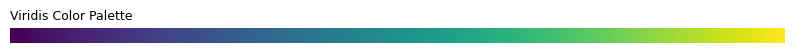

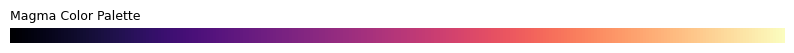

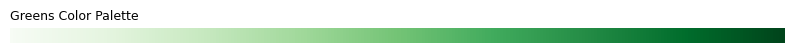

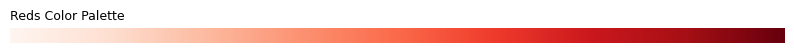

In [9]:
# Define the colormap
for cmap_item in ['viridis', 'magma','Greens','Reds']:
    cmap = plt.get_cmap(cmap_item)
    # Create a color gradient
    gradient = np.linspace(0, 1, 256).reshape(1, -1)
   # Display the color palette
    plt.figure(figsize=(10, 0.2))
    plt.imshow(gradient, aspect='auto', cmap=cmap)
    plt.axis('off')
    plt.title(f'{cmap_item.capitalize()} Color Palette', loc='left', fontsize=9)
    plt.show()

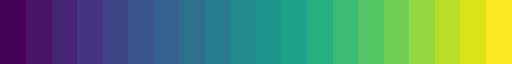

In [10]:
plt.get_cmap('viridis',lut=20)

In [11]:
(
 tmp_pivot
 .style
 .set_table_styles([headers, index_style])
 .background_gradient(cmap='viridis',subset=columns)
)

,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000
5,Health & Fitness,1.330000,3.240000,1.500000,1.210000,2.150000,1.830000
6,Lifestyle,0.290000,1.270000,0.810000,0.900000,1.080000,1.370000
7,Music,2.740000,0.000000,0.000000,2.080000,5.270000,13.160000
8,Photo & Video,0.750000,0.740000,1.360000,2.160000,1.470000,1.330000
9,Productivity,0.660000,2.490000,0.990000,4.900000,4.730000,2.610000


## Style: Color Background in columns

In [12]:
(
 tmp_pivot
 .style
 .set_table_styles([headers, index_style])
 .set_properties(**{'background-color': '#FFCFC9','color':'black'},subset=['rating_0','rating_1'])
 .set_properties(**{'background-color': '#FFF1B0','color':'black'},subset=['rating_2','rating_3'])
 .set_properties(**{'background-color': '#BEEAE5','color':'black'},subset=['rating_4','rating_5'])
)

,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000
5,Health & Fitness,1.330000,3.240000,1.500000,1.210000,2.150000,1.830000
6,Lifestyle,0.290000,1.270000,0.810000,0.900000,1.080000,1.370000
7,Music,2.740000,0.000000,0.000000,2.080000,5.270000,13.160000
8,Photo & Video,0.750000,0.740000,1.360000,2.160000,1.470000,1.330000
9,Productivity,0.660000,2.490000,0.990000,4.900000,4.730000,2.610000


## Style: Color Bar

In [13]:
(
 tmp_pivot
 .style
 .set_table_styles([headers, index_style])
 .set_properties(**{'background-color': '#ECE3FF', 'color': 'black'})
 .set_properties(**{'background-color': 'white','color':'black'},subset=columns)
 .bar(color='#FFCFC9',subset=['rating_0','rating_1'])
 .bar(color='#FFF1B0',subset=['rating_2','rating_3'])
 .bar(color='#BEEAE5',subset=['rating_4','rating_5'])
)

,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000
5,Health & Fitness,1.330000,3.240000,1.500000,1.210000,2.150000,1.830000
6,Lifestyle,0.290000,1.270000,0.810000,0.900000,1.080000,1.370000
7,Music,2.740000,0.000000,0.000000,2.080000,5.270000,13.160000
8,Photo & Video,0.750000,0.740000,1.360000,2.160000,1.470000,1.330000
9,Productivity,0.660000,2.490000,0.990000,4.900000,4.730000,2.610000


## Style: Image in Columns

In [14]:
# create a function to add an image to the dataframe depending on the genre
def add_image(image_name):
    img_url = f"img/icons/img_{image_name}.png"
    width = "width: 50px"
    height = "height: 50px"
    text_align ="center"
    return f'{width};{height}; content: url({img_url}); text-align:{text_align}'

# apply the function to the dataframe
styled_df = (
 tmp_pivot
 .head(5)
 .reset_index()
 .rename({'index': 'genre'}, axis=1)
 .style.applymap(add_image, subset=pd.IndexSlice[:, ['genre']])
 .set_table_styles([headers, index_style])
 .set_properties(**{'background-color': '#ECE3FF', 'color': 'black'})
)

# display the dataframe with the images
display(styled_df)

,genre,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000
